In [ ]:
!pip install --user tensorflow


In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


Label or Target is 8
shape of the image (28, 28)


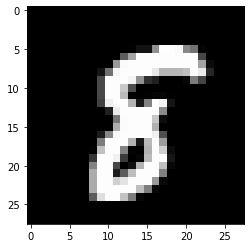

In [6]:
from matplotlib import pyplot as plt
print('Label or Target is',Y_train[2001])
print("shape of the image", X_train[2001].shape)
plt.imshow(X_train[2001], cmap='gray')

In [7]:
print(X_train[2001])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  18 145 255
  254 249 136 115   5   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  93 163 253 253 253 253
  253 253 253 253  70   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 152 250 253 253 253 253 253
  253 253 253 253 164  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 113 246 253 253 253 25

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [9]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
print(X_train.max(), X_train.min())

255 0


In [11]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train/=255
X_test/=255

In [12]:
print(X_train.max())

1.0


In [13]:
print(X_test.min())

0.0


In [14]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)
print(Y_train.shape)
print(Y_train[2001])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_split=0.3)

Epoch 1/2
1313/1313 [==============================] - 160s 121ms/step - loss: 0.1356 - accuracy: 0.9586 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 2/2
1313/1313 [==============================] - 138s 105ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0569 - val_accuracy: 0.9836


In [20]:
import numpy as np
print("Actual target Label", Y_test[2000:2001])
val = model.predict(X_test[2000:2001])
print("Predicted target Label", np.round(val))

Actual target Label [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Predicted target Label [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
